In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
gold_dataset = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_dataset.shape

(2290, 6)

In [ ]:
gold_dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
gold_dataset.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
# To get some statistical info
gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
gold1 = gold_dataset.drop(['Date'],axis=1)

Correlation:

1. Positive correlation
2. Negetive correlation

we need it to check the relation between various parameters and gold

In [ ]:
correlation = gold1.corr()

<Axes: >

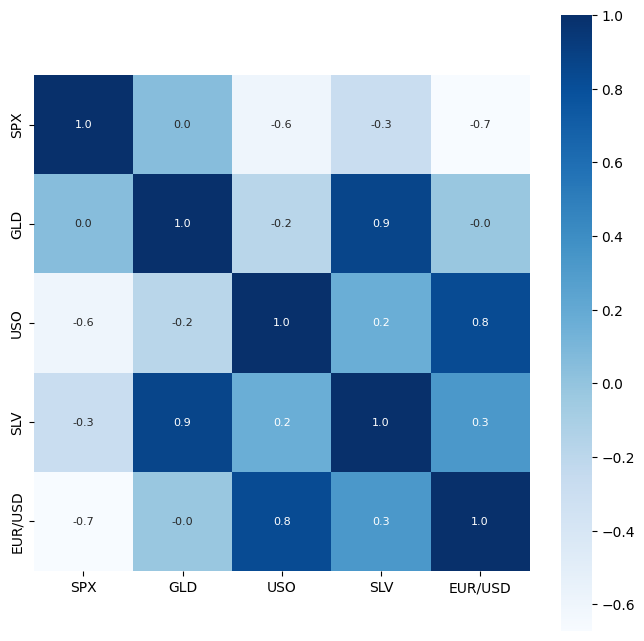

In [ ]:
#Constructing a heat map to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cmap='Blues' , square=True , fmt='.1f' , annot=True, annot_kws={'size':8}, cbar=True)

In [ ]:
# correlation values of gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-18-7cc0d326906d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_dataset['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

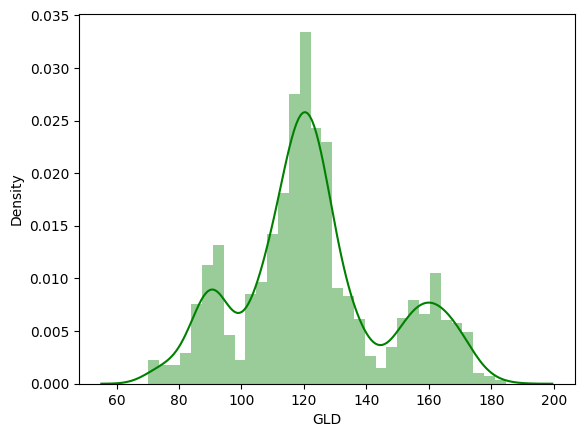

In [ ]:
# Checking the distribution of the GLD price
sns.distplot(gold_dataset['GLD'],color='green')

Spliting the Features and Target

In [ ]:
X = gold_dataset.drop(['Date','GLD'],axis=1)
Y = gold_dataset['GLD']

In [ ]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Spliting into training and test data

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

Model Training:

Random Forest Algorithm

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [ ]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[113.92510024 147.13720125 140.49679868 112.45790135 113.6454995
  95.61639955 111.94219972  93.37929938 120.89400054 127.03939915
 147.86439953 120.56569889 119.22940041  88.19180063  96.11310001
  92.73359888 116.59660077  89.27589926 125.58690139 114.88420004
 118.78369948 152.51200274 122.82149807 119.99809998 170.92069942
 108.15529863 120.64310064  87.1526987   88.13490073  88.62699925
 121.31390063 154.0351024  149.88899884 125.99939995 126.54370001
  90.89249909 156.67669969 121.35640184 106.64990055 144.14259691
  92.4693996  127.6976007  117.80890093 152.55930133 119.38199954
  91.30230133  79.36260014 120.0652018  132.12869878 119.05339924
 127.43010097 165.67220077 153.36770042  92.64429938 149.24310032
 151.76179952 113.04250093 112.66630052  87.0154993  127.7536988
 125.32530081 151.58110259 114.48280018 110.60960032 160.56479763
 117.40199881 108.68890113 132.01779924 133.32199982 125.52380048
 116.84509984 149.93240184 155.85710004 168.99499564 109.83560087
 141.1873976

In [ ]:
# R^2 error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print('R-squared error:',error_score)

R-squared error: 0.987638005410351


Compare the Actual values and Predicted values in a plot

In [ ]:
Y_test = list(Y_test)

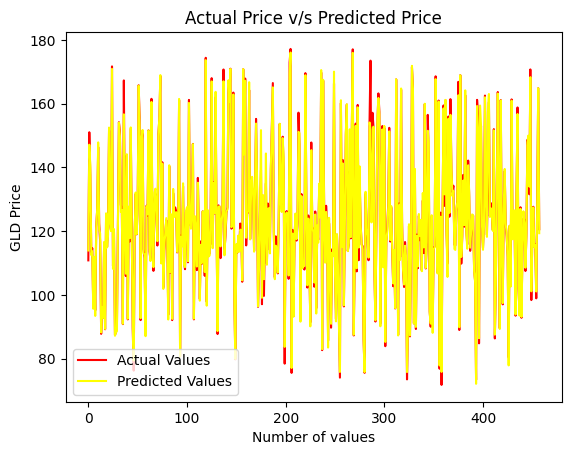

In [ ]:
plt.plot(Y_test, color='red', label='Actual Values')
plt.plot(test_data_prediction, color='yellow', label='Predicted Values')
plt.title('Actual Price v/s Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()